In [2]:
from dotenv import load_dotenv
load_dotenv()
from langchain_groq import ChatGroq
model = ChatGroq(model="llama-3.1-8b-instant")

In [4]:
from typing import TypedDict, Annotated
from langgraph.graph import add_messages

class State(TypedDict):
    messages:Annotated[list,add_messages]

In [5]:
def superBot(state:State):
    print("Super Bot is Called")
    return {"messages":[model.invoke(state["messages"])]}

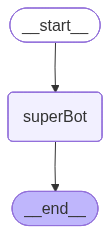

In [6]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,END,START

#Define the graph
graph = StateGraph(State)

#Define the Nodes
graph.add_node("superBot",superBot)

#Define the workflow
graph.add_edge(START,"superBot")
graph.add_edge("superBot",END)

#Comile the graph
graph_builder = graph.compile()

#Draw the Graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [7]:
graph_builder.invoke({"messages":"What is AI"})

Super Bot is Called


{'messages': [HumanMessage(content='What is AI', additional_kwargs={}, response_metadata={}, id='1f5b2b4d-1783-4bbf-b4cc-03625e2e3ee6'),
  AIMessage(content='AI, or Artificial Intelligence, refers to the simulation of human intelligence in machines that are programmed to think and learn like humans. The term can also be applied to any machine that exhibits traits associated with a human mind such as learning and problem-solving.\n\nAI technology is based on the principle of developing algorithms that can interpret and process data, make decisions, and improve over time through experience and learning. The goal of AI is to create machines that can perform tasks that typically require human intelligence, such as:\n\n1. **Learning**: AI systems can learn from data, identify patterns, and make decisions based on that data.\n2. **Reasoning**: AI systems can reason and draw conclusions from the data they have learned.\n3. **Problem-solving**: AI systems can solve complex problems and make de

#### using Streaming

In [10]:
for event in graph_builder.stream({"messages":"write a essay about psi scam in karnataka more than 8000 words it include introduction,explaination and conclusion "},stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='write a essay about psi scam in karnataka more than 8000 words it include introduction,explaination and conclusion ', additional_kwargs={}, response_metadata={}, id='87c1d354-dbf0-4148-be87-c0610a21a265')]}
Super Bot is Called
{'messages': [HumanMessage(content='write a essay about psi scam in karnataka more than 8000 words it include introduction,explaination and conclusion ', additional_kwargs={}, response_metadata={}, id='87c1d354-dbf0-4148-be87-c0610a21a265'), AIMessage(content="**The Psi Scam in Karnataka: A Deep Dive into the Web of Deceit**\n\n**Introduction**\n\nKarnataka, a state in southern India known for its rich cultural heritage and vibrant economy, has recently been marred by a scandal that has sent shockwaves across the nation. The Psi scam, also known as the PSI (Police Sub-Inspector) scam, has been a major embarrassment for the state government and has raised serious questions about the integrity of the police force in Karnataka. In